## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1: Data Visualization and Analysis

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is bike_rental.csv.


In [4]:
# Load the dataset
bike_rental_df = pd.read_csv('/content/drive/My Drive/aml-fall2023-assignment1-zjgxky-main/Data/bike_rental.csv')
bike_rental_df

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<b> 1.1 Create a bar chart to compare the average bike rental count on holiday and non-holiday weekdays. Are there differences in rental patterns? </b>

<ipython-input-5-ea7aa330f824>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_counts = bike_rental_df.groupby(['weekday', 'holiday']).mean().reset_index()


<Figure size 2400x1500 with 0 Axes>

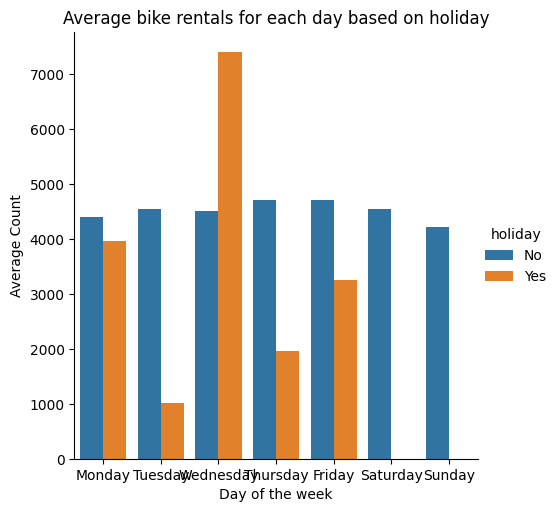

In [5]:
avg_counts = bike_rental_df.groupby(['weekday', 'holiday']).mean().reset_index()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(24,15))
sns.catplot(x="weekday", y="count", hue="holiday", data=avg_counts, kind="bar", order=days_order)

# Adding labels and title
plt.title("Average bike rentals for each day based on holiday")
plt.ylabel("Average Count")
plt.xlabel("Day of the week")
plt.show()

Comment: on Wednesday, holiday has more count of bike than non-holiday. On other days, non-holiday count of rent are higher than holiday.

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables. </b>
1. month
2. season
3. working_day
4. weather
<b></b>

<Axes: title={'center': 'Average Count By Month'}, xlabel='Month', ylabel='Average Count'>

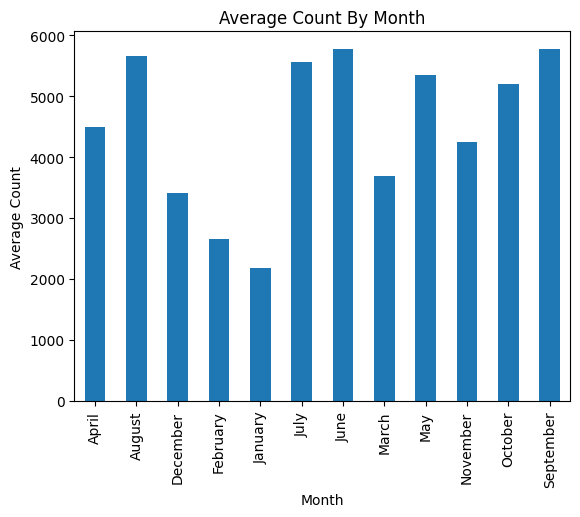

In [6]:
### Code here
month_count = bike_rental_df.groupby(['month'])['count'].mean()

month_count.plot(kind='bar', title='Average Count By Month', ylabel='Average Count',
         xlabel='Month')

<Axes: title={'center': 'Average Count By Season'}, xlabel='Season', ylabel='Average Count'>

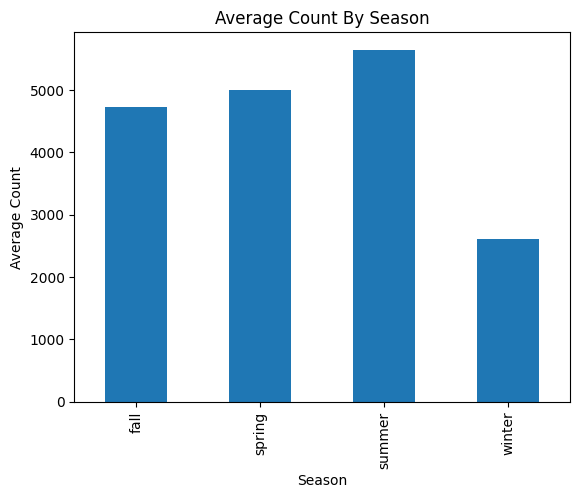

In [7]:
season_count = bike_rental_df.groupby(['season'])['count'].mean()

season_count.plot(kind='bar', title='Average Count By Season', ylabel='Average Count',
         xlabel='Season')

<Axes: title={'center': 'Average Count By Working Day'}, xlabel='Working Day', ylabel='Average Count'>

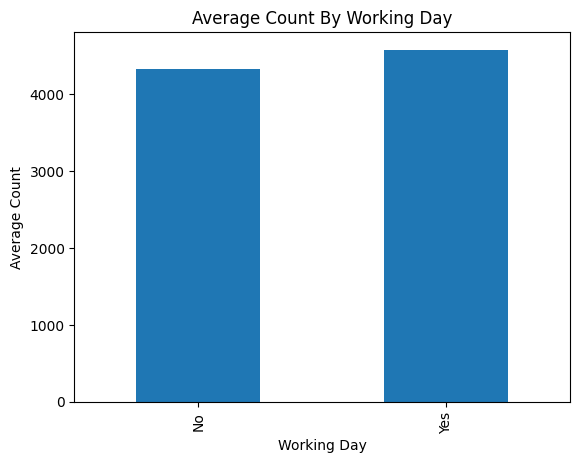

In [8]:
workingday_count = bike_rental_df.groupby(['working_day'])['count'].mean()

workingday_count.plot(kind='bar', title='Average Count By Working Day', ylabel='Average Count',
         xlabel='Working Day')

<Axes: title={'center': 'Average Count By Weather'}, xlabel='Weather', ylabel='Average Count'>

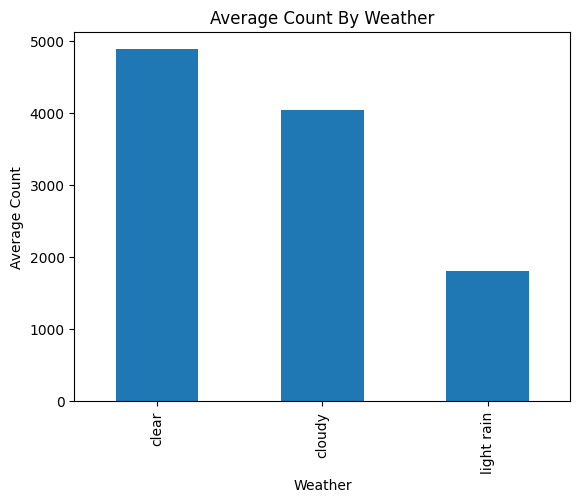

In [9]:
weather_count = bike_rental_df.groupby(['weather'])['count'].mean()

weather_count.plot(kind='bar', title='Average Count By Weather', ylabel='Average Count',
         xlabel='Weather')

<b> 1.3 Compare the number of registered and casual bike rentals over time by month. Create a stacked bar chart to show the contributions of each user type. </b>

In [10]:
### Code here
bike_rental_df2 = bike_rental_df.groupby('month')['registered', "casual"].sum().reset_index()
bike_rental_df2

<ipython-input-10-ae232e7bc476>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bike_rental_df2 = bike_rental_df.groupby('month')['registered', "casual"].sum().reset_index()


,month,registered,casual
0,April,208292,60802
1,August,279155,72039
2,December,189343,21693
3,February,136389,14963
4,January,122891,12042
5,July,266791,78157
6,June,272436,73906
7,March,184476,44444
8,May,256401,75285
9,November,218228,36603


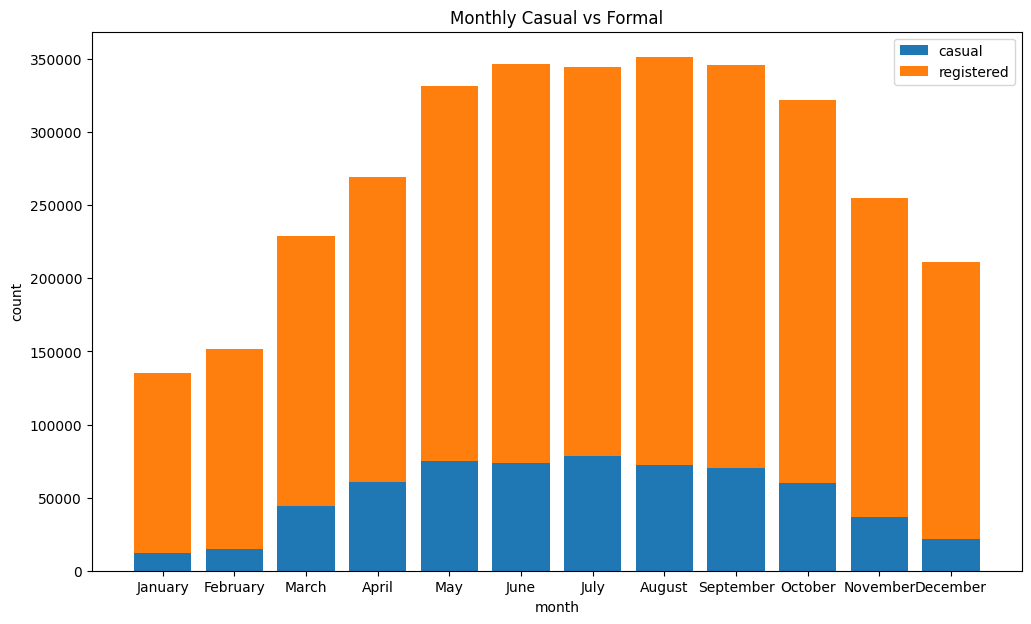

In [11]:
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
bike_rental_df2['month'] = pd.Categorical(bike_rental_df2['month'], categories=months_order, ordered=True)
bike_rental_df3 = bike_rental_df2.sort_values('month')

# Plot
plt.figure(figsize=(12, 7))
plt.bar(bike_rental_df3["month"], bike_rental_df3["casual"], label="casual")
plt.bar(bike_rental_df3["month"], bike_rental_df3["registered"], bottom=bike_rental_df3["casual"], label="registered")

# Adding labels, title, and legend
plt.ylabel("count")
plt.xlabel("month")
plt.title("Monthly Casual vs Formal")
plt.legend()

plt.show()

<b> 1.4 Plot relationships between the following features and the target variable count as a small multiple of scatter plots. </b>

1. temp
2. feels_temp
3. humidity
4. windspeed
<b></b>

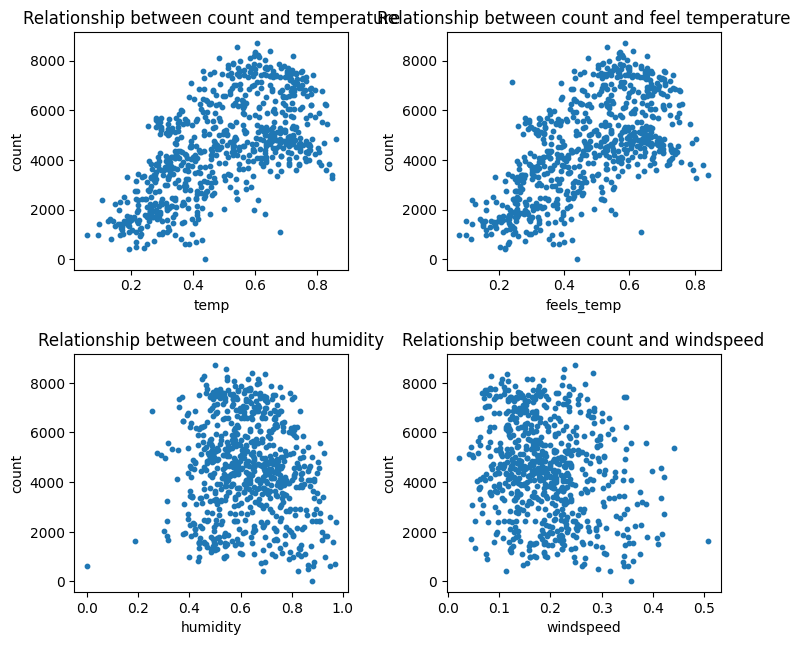

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))
fig.tight_layout(pad=4.0)

# Plotting
bike_rental_df.plot.scatter(x='temp', y='count', s=10, ax=axes[0, 0], title="Relationship between count and temperature")
bike_rental_df.plot.scatter(x='feels_temp', y='count', s=10, ax=axes[0, 1], title="Relationship between count and feel temperature")
bike_rental_df.plot.scatter(x='humidity', y='count', s=10, ax=axes[1, 0], title="Relationship between count and humidity")
bike_rental_df.plot.scatter(x='windspeed', y='count', s=10, ax=axes[1, 1], title="Relationship between count and windspeed")

plt.show()

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of bike rentals based on weather and time. We will use linear regression to predict the count using weather and time.

In [13]:
# split data into features and labels

bike_rental_X = bike_rental_df.drop(columns=['count', 'casual', 'registered'])
bike_rental_y = bike_rental_df['count']

**2.1.1 Plot the relationships between the label (count) and the continuous features (temp, feels_temp, humidity, windspeed, casual, registered) using a small multiple of scatter plots. Make sure to label the axes.**

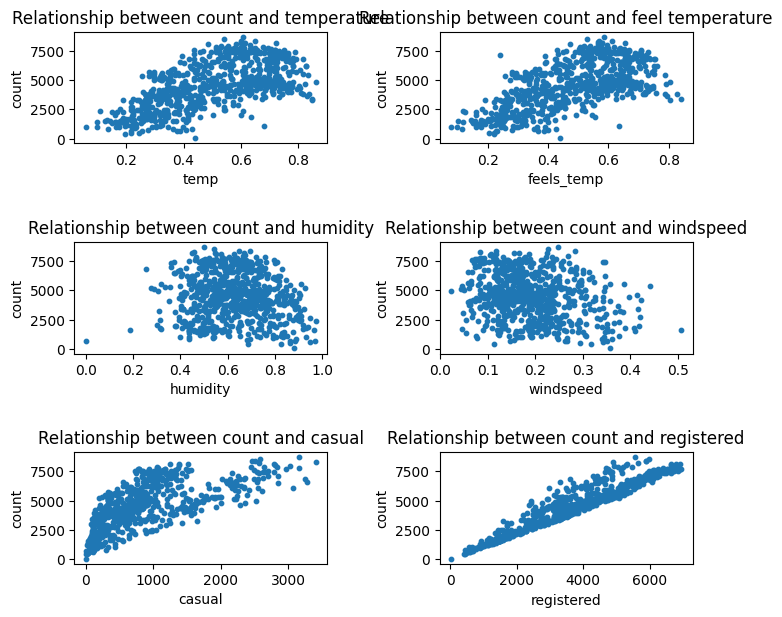

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 7))
fig.tight_layout(pad=5.0)

# Plotting
bike_rental_df.plot.scatter(x='temp', y='count', s=10, ax=axes[0, 0], title="Relationship between count and temperature")
bike_rental_df.plot.scatter(x='feels_temp', y='count', s=10, ax=axes[0, 1], title="Relationship between count and feel temperature")
bike_rental_df.plot.scatter(x='humidity', y='count', s=10, ax=axes[1, 0], title="Relationship between count and humidity")
bike_rental_df.plot.scatter(x='windspeed', y='count', s=10, ax=axes[1, 1], title="Relationship between count and windspeed")
bike_rental_df.plot.scatter(x = 'casual', y = 'count', s = 10, ax=axes[2, 0], title="Relationship between count and casual")
bike_rental_df.plot.scatter(x = 'registered', y = 'count', s = 10, ax=axes[2, 1], title="Relationship between count and registered")


plt.show()

**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

Yes. There are some linear patterns between count and variables like temperture and feels_temperature, probably also on humidity and windspeed although it is not obivous now due to large scale on y. We can also assume that everyday the number of bikes being rent is independent. Other assumption of linear regression can be checked after the model is built.

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


**2.1.3 Encode the categorical variables of the Bike Rental dataset.**

In [15]:
### code here
bike_rental_df_onehot = pd.get_dummies(bike_rental_X, prefix=['month', 'season', 'holiday', 'weekday', 'working_day', 'weather'])
bike_rental_df_onehot.shape

(731, 34)

**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

In [16]:
### Code here
corrM = bike_rental_df_onehot.corr()
corrM.style.background_gradient(cmap='coolwarm')

,temp,feels_temp,humidity,windspeed,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,season_fall,season_spring,season_summer,season_winter,holiday_No,holiday_Yes,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,working_day_No,working_day_Yes,weather_clear,weather_cloudy,weather_light rain
temp,1.000000,0.991702,0.126963,-0.157944,-0.041499,0.354804,-0.285169,-0.311845,-0.430932,0.432837,0.308489,-0.174486,0.165445,-0.206243,-0.017262,0.197963,-0.224793,0.155424,0.678471,-0.619800,0.028556,-0.028556,0.000456,-0.004333,-0.029882,-0.026323,0.019941,0.019809,0.020574,-0.052660,0.052660,0.116091,-0.097706,-0.058238
feels_temp,0.991702,1.000000,0.139988,-0.183643,-0.031717,0.331105,-0.277030,-0.311832,-0.438476,0.429469,0.300943,-0.172731,0.170689,-0.196468,-0.004451,0.192704,-0.204904,0.163661,0.655956,-0.625061,0.032507,-0.032507,-0.008108,0.000525,-0.030889,-0.022801,0.020873,0.022465,0.018148,-0.052182,0.052182,0.114951,-0.094253,-0.064727
humidity,0.126963,0.139988,1.000000,-0.248489,-0.083682,0.021038,0.081590,-0.123468,-0.089973,-0.064204,-0.109435,-0.084312,0.130608,-0.006340,0.140880,0.182404,0.162732,-0.003854,0.023101,-0.181336,0.015937,-0.015937,-0.040456,0.027861,-0.023980,-0.000677,-0.052636,0.039875,0.050000,-0.024327,0.024327,-0.575317,0.491834,0.267011
windspeed,-0.157944,-0.183643,-0.248489,1.000000,0.169877,-0.069058,-0.054550,0.094619,0.062173,-0.096021,-0.019562,0.126626,-0.029471,-0.025811,-0.060067,-0.094758,-0.135466,0.097513,-0.139732,0.178154,-0.006292,0.006292,-0.021548,0.001081,0.032266,-0.010346,0.005873,0.007042,-0.014461,0.018796,-0.018796,-0.003964,-0.037408,0.117362
month_April,-0.041499,-0.031717,-0.083682,0.169877,1.000000,-0.091033,-0.091033,-0.086960,-0.091033,-0.091033,-0.089419,-0.091033,-0.091033,-0.089419,-0.091033,-0.089419,-0.169653,0.515584,-0.175952,-0.171543,-0.008245,0.008245,0.006616,0.005424,0.005424,0.005424,-0.007651,-0.007651,-0.007651,0.011145,-0.011145,-0.010371,0.007654,0.008245
month_August,0.354804,0.331105,0.021038,-0.069058,-0.091033,1.000000,-0.092676,-0.088530,-0.092676,-0.092676,-0.091033,-0.092676,-0.092676,-0.091033,-0.092676,-0.091033,-0.172715,-0.176562,0.517373,-0.174639,0.052356,-0.052356,0.002519,0.001321,-0.012678,-0.012678,0.002519,0.002519,0.016575,-0.037940,0.037940,0.038012,-0.020236,-0.052356
month_December,-0.285169,-0.277030,0.081590,-0.054550,-0.091033,-0.092676,1.000000,-0.088530,-0.092676,-0.092676,-0.091033,-0.092676,-0.092676,-0.091033,-0.092676,-0.091033,0.284895,-0.176562,-0.179127,0.075632,-0.006434,0.006434,0.002519,0.001321,0.015321,0.001321,0.002519,-0.011537,-0.011537,0.014867,-0.014867,-0.074072,0.062811,0.035829
month_February,-0.311845,-0.311832,-0.123468,0.094619,-0.086960,-0.088530,-0.088530,1.000000,-0.088530,-0.088530,-0.086960,-0.088530,-0.088530,-0.086960,-0.088530,-0.086960,-0.164989,-0.168664,-0.171114,0.506932,-0.011072,0.011072,-0.001598,-0.002726,-0.002726,-0.002726,-0.001598,-0.001598,0.013007,-0.000135,0.000135,0.009501,-0.002804,-0.019471
month_January,-0.430932,-0.438476,-0.089973,0.062173,-0.091033,-0.092676,-0.092676,-0.088530,1.000000,-0.092676,-0.091033,-0.092676,-0.092676,-0.091033,-0.092676,-0.091033,-0.172715,-0.176562,-0.179127,0.530670,-0.035829,0.035829,-0.011537,0.015321,0.001321,0.015321,-0.011537,0.002519,-0.011537,0.025428,-0.025428,-0.023125,0.031668,-0.022961
month_July,0.432837,0.429469,-0.064204,-0.096021,-0.091033,-0.092676,-0.092676,-0.088530,-0.092676,1.000000,-0.091033,-0.092676,-0.092676,-0.091033,-0.092676,-0.091033,-0.172715,-0.176562,0.517373,-0.174639,-0.006434,0.006434,0.002519,0.001321,0.001321,0.015321,-0.011537,0.002519,-0.011537,0.014867,-0.014867,0.119527,-0.113665,-0.022961


In [17]:
### Code here
bike_rental_df_onehot_indep = bike_rental_df_onehot.drop(columns=['feels_temp'])
bike_rental_df_onehot_indep.shape

(731, 33)

comment: Temp and feels_temp has correlation > 0.9, so choose to drop feels_temp to prevent multicollinearity. Multicollinearity makes prediction unstable, that a subtle change in x will cause large change in y, which undermines the significance of features in prediction.

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [18]:
### Code here
trainvalid_X, bike_rental_X_test, trainvalid_y, bike_rental_y_test = train_test_split(bike_rental_df_onehot_indep, bike_rental_y, train_size=0.8, random_state=42)
bike_rental_X_train, bike_rental_X_val, bike_rental_y_train, bike_rental_y_val = train_test_split(trainvalid_X, trainvalid_y, train_size=0.75, random_state=42)
print(bike_rental_X_train.shape, bike_rental_y_train.shape, bike_rental_X_val.shape, bike_rental_y_val.shape, bike_rental_X_test.shape, bike_rental_y_test.shape)

(438, 33) (438,) (146, 33) (146,) (147, 33) (147,)


**2.1.6 Standardize the columns in the feature matrices.**

In [19]:
### Code here
scaler=StandardScaler()
bike_rental_X_train[['temp',	'humidity',	'windspeed']] = scaler.fit_transform(bike_rental_X_train[['temp',	'humidity',	'windspeed']])
bike_rental_X_val[['temp',	'humidity',	'windspeed']] = scaler.fit_transform(bike_rental_X_val[['temp',	'humidity',	'windspeed']])
bike_rental_X_test[['temp',	'humidity',	'windspeed']] = scaler.fit_transform(bike_rental_X_test[['temp',	'humidity',	'windspeed']])

In [20]:
#Adding a column of ones to the feature matrices for the bias term.

bike_rental_X_train = np.hstack([np.ones((bike_rental_X_train.shape[0], 1)), bike_rental_X_train])
bike_rental_X_val = np.hstack([np.ones((bike_rental_X_val.shape[0], 1)), bike_rental_X_val])
bike_rental_X_test = np.hstack([np.ones((bike_rental_X_test.shape[0], 1)), bike_rental_X_test])


At the end of this pre-processing, you should have the following vectors and matrices:
- Bike Rental Prediction dataset: bike_rental_X_train, bike_rental_X_val, bike_rental_X_test, bike_rental_y_train, bike_rental_y_val, bike_rental_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [21]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        None
        '''
        regularization = self.alpha * np.eye(X.shape[1])
        self.w = np.linalg.solve((X.T @ X + regularization), (X.T @ y))
        #print('size of w', self.w)
        return None

    def predict(self, X):
        '''Predicts on X using trained model.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X @ self.w

        return y_pred

    def opt_weight(self):
      return self.w

### Train, Evaluate, and Interpret LR Model

**2.1.8 Train a linear regression model ($\alpha = 0$) on the bike rental training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [22]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [23]:
### Code here
model = LinearRegression(alpha = 1e-13)
model.train(bike_rental_X_train, bike_rental_y_train)

predict_train = model.predict(bike_rental_X_train)
predict_val = model.predict(bike_rental_X_val)
predict_test = model.predict(bike_rental_X_test)

In [24]:
r2_train = r2_score(bike_rental_y_train, predict_train)
r2_val = r2_score(bike_rental_y_val, predict_val)
r2_test = r2_score(bike_rental_y_test, predict_test)

print("R^2 score of training set:", r2_train)
print("R^2 score of validation set:", r2_val)
print("R^2 score of testing set:", r2_test)

get_report(predict_train, bike_rental_y_train)

R^2 score of training set: 0.6052188928835176
R^2 score of validation set: 0.5043648838765868
R^2 score of testing set: 0.5111794978623991


,Prediction,Actual
Position,,
1,3275.981142,1096
2,5825.053946,4390
3,2083.893055,754
436,4603.245758,5633
437,4251.144399,4128
438,6208.452300,5805


**2.1.9 As a baseline model, use the mean of the training labels (bike_rental_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [25]:
### Code here
avg_y_train = bike_rental_y_train.mean()
r2_train_avg = r2_score(bike_rental_y_train, [avg_y_train]*len(bike_rental_y_train))
r2_val_avg = r2_score(bike_rental_y_val, [avg_y_train]*len(bike_rental_y_val))
r2_test_avg = r2_score(bike_rental_y_test, [avg_y_train]*len(bike_rental_y_test))
r2_train_avg, r2_val_avg, r2_test_avg

(0.0, -0.015029162195203005, -0.028273992214649102)

**2.1.10 Interpret your model trained on the bike rental dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [26]:
### Code here
weights = model.opt_weight()   # I add a function in the class
columnname = ['biased term'] + list(bike_rental_df_onehot_indep.columns)

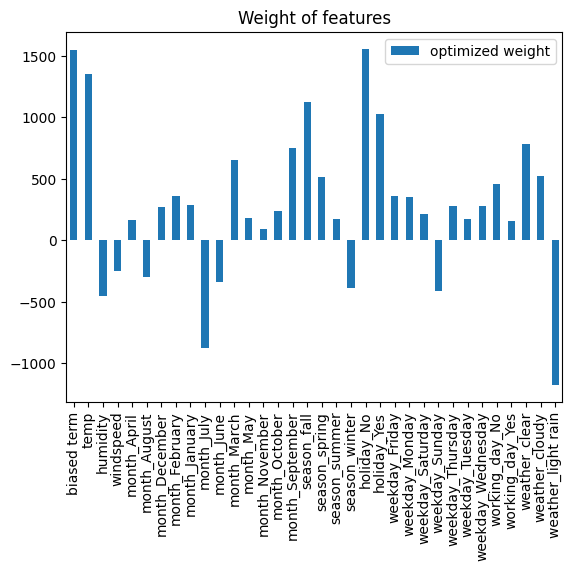

In [27]:
names = ["optimized weight"]
fig, ax = plt.subplots()
pd.DataFrame(weights, index=columnname, columns = names).plot.bar(ax = ax)
plt.title("Weight of features")
plt.show()

**2.1.11 According to your model, which features are the greatest contributors to the car price?**

**comment:**

non-holiday, whether light_rain, whether fall season, temperature influence the most from the magnitude of weights.

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the bike rental dataset.

**2.1.12 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

1e-05
2.06913808111479e-05
4.281332398719396e-05
8.858667904100833e-05
0.00018329807108324357
0.000379269019073225
0.0007847599703514606
0.001623776739188721
0.003359818286283781
0.0069519279617756054
0.01438449888287663
0.029763514416313162
0.06158482110660261
0.1274274985703132
0.26366508987303555
0.5455594781168515
1.1288378916846884
2.3357214690901213
4.832930238571752
10.0


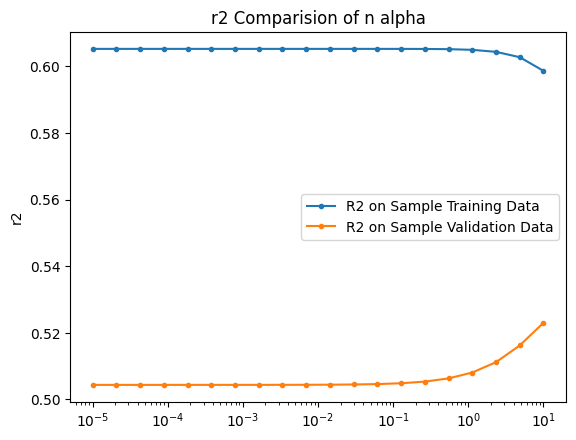

In [28]:
def alpha_trail():
  alphas = np.logspace(-5, 1, 20)
  train_r2_list = []
  valid_r2_list = []
  for i in alphas:
    print(i)
    model = LinearRegression(alpha = i)
    model.train(bike_rental_X_train, bike_rental_y_train)

    predict_train_alpha = model.predict(bike_rental_X_train)
    predict_val_alpha = model.predict(bike_rental_X_val)

    r2_train = r2_score(bike_rental_y_train, predict_train_alpha)
    r2_val = r2_score(bike_rental_y_val, predict_val_alpha)

    train_r2_list.append(r2_train)
    valid_r2_list.append(r2_val)

  plt.plot(alphas, train_r2_list, '.-', label = 'R2 on Sample Training Data')
  plt.plot(alphas, valid_r2_list, '.-', label = 'R2 on Sample Validation Data')
  plt.xscale('log')
  ticks = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
  plt.xticks(ticks)
  #plt.xlabel(r'$log(alpha)$')
  plt.ylabel('r2')
  plt.title('r2 Comparision of n alpha')
  plt.legend(loc = 'best')
  plt.show()

alpha_trail()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

R2 of training set decresases, and validation set increases. Therefore, it is better to choose big alpha from the performance of validation set. It also helps prevent overfitting with large alpha.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [29]:
### Code here
loan_data_df = pd.read_csv('/content/drive/My Drive/aml-fall2023-assignment1-zjgxky-main/Data/loan_data.csv')
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

In [30]:
### Code here
loan_data_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
### Code here
loan_data_df_nonan = loan_data_df.dropna()
loan_data_df_nonan.shape

(480, 12)

Yes, there is missing value. I will firstly try to delete the data to ensure accuracy of prediction. However, if too much data are deteled leading to significant decrease of data size, I will try to use mean of the feature to replace the missing value. Here, there is still many data left. I choose to drop rows with null value.

**2.2.3 Encode the categorical variables.**

In [32]:
### Code here
loan_data_df_nonan_onehot = pd.get_dummies(loan_data_df_nonan, prefix=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])
loan_data_df_nonan_onehot.shape

(480, 22)

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

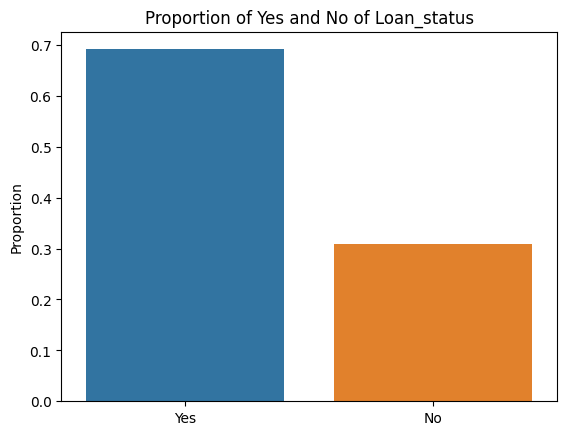

In [34]:
pct_Y = loan_data_df_nonan_onehot['Loan_Status_Y'].sum() / loan_data_df_nonan_onehot.shape[0]
pct_N = loan_data_df_nonan_onehot['Loan_Status_N'].sum() / loan_data_df_nonan_onehot.shape[0]
pct = [pct_Y, pct_N]

# Plot
sns.barplot(x=['Yes', 'No'], y=pct)
plt.ylabel('Proportion')
plt.title('Proportion of Yes and No of Loan_status')
plt.show()

It is not balanced. Loan_status with Yes is more than 2 times loan_status with No

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [35]:
### Code here
loan_data_df_nonan_onehot_numeric = loan_data_df_nonan_onehot.drop(['Loan_Status_Y', 'Loan_Status_N'], axis=1)
corrM2 = loan_data_df_nonan_onehot_numeric.corr()
corrM2.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.032644,0.032644,-0.036717,0.036717,-0.121405,0.071367,-0.017426,0.143633,0.131172,-0.131172,-0.170785,0.170785,0.045154,0.000551,-0.044767
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.156171,0.156171,-0.102950,0.102950,0.000991,-0.016015,0.028266,-0.019006,0.074499,-0.074499,0.001509,-0.001509,-0.001101,-0.008322,0.009866
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.098975,0.098975,-0.183442,0.183442,-0.178494,0.087870,0.061174,0.115373,0.172780,-0.172780,-0.120389,0.120389,0.086569,0.013365,-0.098826
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,0.088704,-0.088704,0.107504,-0.107504,0.118518,-0.101258,-0.005885,-0.066826,0.102168,-0.102168,0.034852,-0.034852,0.033777,0.030346,-0.065097
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.022447,0.022447,-0.029095,0.029095,0.011429,-0.005280,0.037047,-0.063797,0.056656,-0.056656,0.023568,-0.023568,-0.022504,0.046480,-0.027062
Gender_Female,-0.032644,-0.156171,-0.098975,0.088704,-0.022447,1.000000,-1.000000,0.349424,-0.349424,0.185582,0.009718,-0.159802,-0.123341,0.059245,-0.059245,-0.002761,0.002761,-0.058739,0.108538,-0.057137
Gender_Male,0.032644,0.156171,0.098975,-0.088704,0.022447,-1.000000,1.000000,-0.349424,0.349424,-0.185582,-0.009718,0.159802,0.123341,-0.059245,0.059245,0.002761,-0.002761,0.058739,-0.108538,0.057137
Married_No,-0.036717,-0.102950,-0.183442,0.107504,-0.029095,0.349424,-0.349424,1.000000,-1.000000,0.410047,-0.154106,-0.261974,-0.162856,0.001652,-0.001652,0.015674,-0.015674,0.039048,-0.011121,-0.026467
Married_Yes,0.036717,0.102950,0.183442,-0.107504,0.029095,-0.349424,0.349424,-1.000000,1.000000,-0.410047,0.154106,0.261974,0.162856,-0.001652,0.001652,-0.015674,0.015674,-0.039048,0.011121,0.026467
Dependents_0,-0.121405,0.000991,-0.178494,0.118518,0.011429,0.185582,-0.185582,0.410047,-0.410047,1.000000,-0.515771,-0.534999,-0.352453,0.014369,-0.014369,0.081585,-0.081585,0.043191,0.034147,-0.078323


No high correlation between numeric variables

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [36]:
# convert to Numpy vector
loan_data_y = loan_data_df_nonan['Loan_Status'].replace({'Y':1, 'N':0})
loan_data_y = np.array(loan_data_y)
#loan_data_df_nonan_onehot_numeric_np = np.array(loan_data_df_nonan_onehot_numeric)

# split
X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(loan_data_df_nonan_onehot_numeric, loan_data_y, train_size=0.8, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainvalid, y_trainvalid, train_size=0.75, random_state=42)

# standardize
# [['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val  = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# add 1
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(288, 21) (288,) (96, 21) (96,) (96, 21) (96,)


### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [37]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1], 1), dtype=np.float64)  # Explicit data type specification
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''
        Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        X = X.astype(np.float64)
        y = y.astype(np.float64)
        self.w = self.w.astype(np.float64)

        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha * np.sum(self.w**2)

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

    def opt_weight(self):
        return self.w

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

In [38]:
### Code here
#y_train = y_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
logreg = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = logreg.train(X_train, y_train)

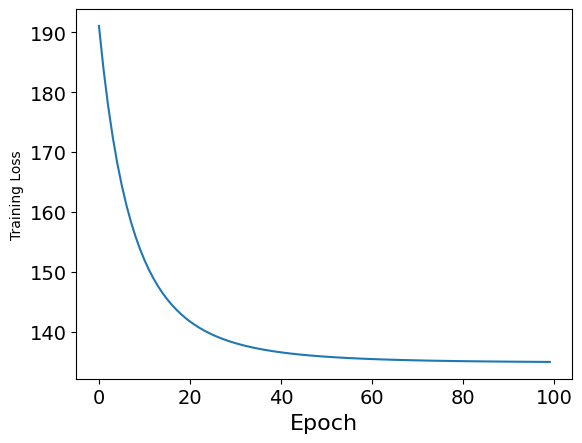

In [39]:
loss = np.array(loss).flatten()
plt.plot(range(len(loss)), loss)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Training Loss')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [43]:
# ii
def hyperparameter_trail():
  alphas = np.random.uniform(0, 1, 20)
  etas = np.random.uniform(0, 0.001, 20)
  ts = np.random.randint(0, 100, 20)
  losses = []
  # Iterate over randomly sampled hyperparameters
  for a, e, t in zip(alphas, etas, ts):
    logReg = LogisticRegression(alpha=a, t=t, eta=e)
    loss = logReg.train(X_train, y_train)
    avg_loss = np.mean(loss)
    losses.append(avg_loss)
  print(losses)
  print(f"Lowest average loss: {np.min(losses)}")
  best_alpha = alphas[np.argmin(losses)]
  best_eta = etas[np.argmin(losses)]
  best_t = ts[np.argmin(losses)]
  print("best alpha", best_alpha)
  print("best etas", best_eta)
  print("best ts", best_t)
  return best_alpha, best_eta, best_t

best_alpha,best_eta,best_t = hyperparameter_trail()

[180.71975947176944, 177.78550002249233, 152.3637570426228, 145.76783548926494, 183.28765901667137, 163.61228314869481, 195.19445905074645, 186.31275140480133, 144.547467702237, 145.30446039404248, 147.17894689749588, 188.34061125186471, 158.96033986086113, 154.6380468884293, 146.30246064974997, 196.58785851130114, 156.0690223704823, 179.22346861471166, 173.4596820123632, 145.55101408488224]
Lowest average loss: 144.547467702237
best alpha 0.11916961085634448
best etas 0.0007311656114679137
best ts 81


In [44]:
# iii
from sklearn.metrics import accuracy_score

tuned_logreg = LogisticRegression(alpha = best_alpha, t = best_t, eta = best_eta)
tuned_logreg.train(X_train, y_train)

tuned_y_pred = tuned_logreg.predict(X_test)

#default prediction
y_pred = logreg.predict(X_test)

In [45]:
default_accuracy = accuracy_score(y_test, y_pred)
tuned_accuracy = accuracy_score(y_test, tuned_y_pred)
print('default accuracy: ', default_accuracy)
print('hyperparameter tuned accuracy: ', tuned_accuracy)

default accuracy:  0.8125
hyperparameter tuned accuracy:  0.8125


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [46]:
### Code here
weights2 = tuned_logreg.opt_weight()
columnname2 = ['biased term'] + list(loan_data_df_nonan_onehot_numeric.columns)

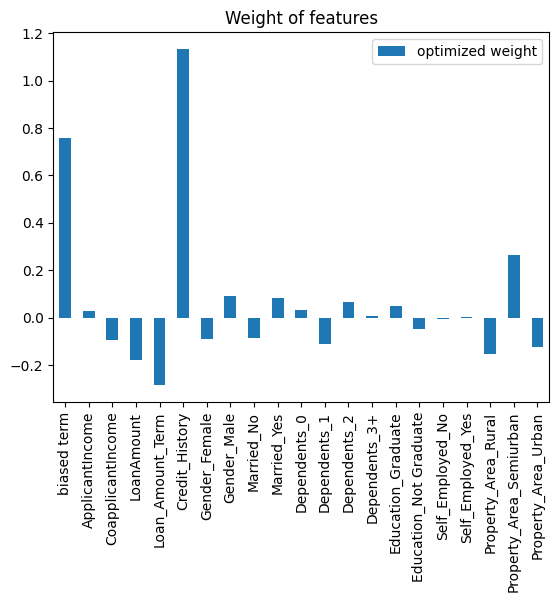

In [47]:
names = ["optimized weight"]
fig, ax = plt.subplots()
pd.DataFrame(weights2, index=columnname2, columns = names).plot.bar(ax = ax)
plt.title("Weight of features")
plt.show()

Credit history has most significant influence on the classfication, it means that people with credit history are likely to have different loan status compared to those who does not have. Other features with more significant influence is whether the property area is urban, and the loan amount term.

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [48]:
### Code here
primal = LinearSVC(dual = False)
primal.fit(X_train, y_train)

primal_y_pred_train = primal.predict(X_train)
primal_y_pred_val = primal.predict(X_val)
primal_y_pred_test = primal.predict(X_test)

primal_accu_train = accuracy_score(y_train, primal_y_pred_train)
primal_accu_val = accuracy_score(y_val, primal_y_pred_val)
primal_accu_test = accuracy_score(y_test, primal_y_pred_test)

print('Accuracy of Primal model at training set:', primal_accu_train)
print('Accuracy of Primal model at validation set:', primal_accu_val)
print('Accuracy of Primal model at testing set:', primal_accu_test)

Accuracy of Primal model at training set: 0.7951388888888888
Accuracy of Primal model at validation set: 0.8333333333333334
Accuracy of Primal model at testing set: 0.8229166666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [49]:
### Code here
dual = LinearSVC(dual = True)
dual.fit(X_train, y_train)

dual_y_pred_train = dual.predict(X_train)
dual_y_pred_val = dual.predict(X_val)
dual_y_pred_test = dual.predict(X_test)

dual_accu_train = accuracy_score(y_train, dual_y_pred_train)
dual_accu_val = accuracy_score(y_val, dual_y_pred_val)
dual_accu_test = accuracy_score(y_test, dual_y_pred_test)

print('Accuracy of Primal model at training set:', dual_accu_train)
print('Accuracy of Primal model at validation set:', dual_accu_val)
print('Accuracy of Primal model at testing set:', dual_accu_test)

Accuracy of Primal model at training set: 0.7951388888888888
Accuracy of Primal model at validation set: 0.8333333333333334
Accuracy of Primal model at testing set: 0.8229166666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
